
Pizza Price Prediction System
1. Predict Pizza Price
2. Visualize Actual vs Predicted Prices
-1. Exit
Enter your choice (1, 2, or -1 to exit): 1

Welcome to the Pizza Price Predictor!
Enter the pizza size (in inches) or press -1 to return to the main menu: 2
The predicted price for a 2.0-inch pizza is: $7.23
Enter the pizza size (in inches) or press -1 to return to the main menu: 6
The predicted price for a 6.0-inch pizza is: $12.08
Enter the pizza size (in inches) or press -1 to return to the main menu: -1
Returning to the main menu...

Pizza Price Prediction System
1. Predict Pizza Price
2. Visualize Actual vs Predicted Prices
-1. Exit
Enter your choice (1, 2, or -1 to exit): 2


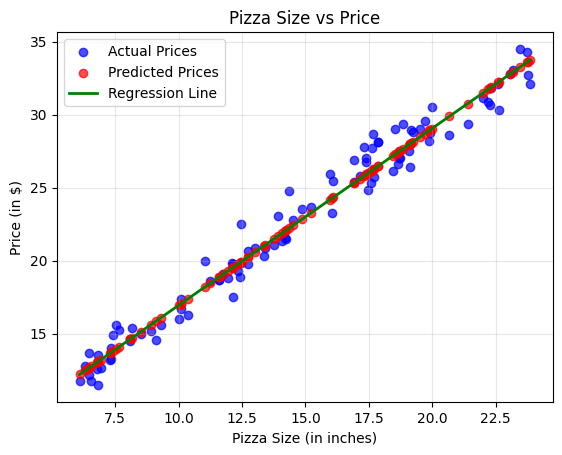

Mean Absolute Error (MAE): $0.81
R² Accuracy: 97.50%
The graph shows how closely the predicted prices match the actual prices.

Pizza Price Prediction System
1. Predict Pizza Price
2. Visualize Actual vs Predicted Prices
-1. Exit
Enter your choice (1, 2, or -1 to exit): -1
Thank you for using the Pizza Price Prediction System. Goodbye!


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
data = pd.read_excel("Pizza_Size_Price_Data.xlsx")

# Extract pizza sizes and prices
pizza_sizes = data["Pizza_Size"].values
pizza_prices = data["Pizza_Price"].values

# Split the data into training and testing sets
def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_count = int(len(X) * test_size)
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(pizza_sizes, pizza_prices)

# Manual Linear Regression
def manual_linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate the slope (m) and intercept (c)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    c = y_mean - m * X_mean

    return c, m

# Train the manual linear regression model
c, m = manual_linear_regression(X_train, y_train)

# Predict function using y = mx + c
def predict(X, m, c):
    return m * X + c

# Function to predict pizza price based on user input
def predict_pizza_price():
    print("\nWelcome to the Pizza Price Predictor!")
    try:
        while True:
            # Ask user for pizza size input
            size = float(input("Enter the pizza size (in inches) or press -1 to return to the main menu: "))

            if size == -1:
                print("Returning to the main menu...")
                break

            if size <= 0:
                print("Pizza size must be greater than 0 inches.")
                continue

            # Predict the price
            predicted_price = predict(size, m, c)

            # Display the predicted price
            print(f"The predicted price for a {size}-inch pizza is: ${predicted_price:.2f}")
    except ValueError:
        print("Invalid input! Please enter a numeric value for pizza size.")

# Function to visualize actual vs predicted prices
def visualize_predictions():
    # Generate predictions for the test set
    y_pred = predict(X_test, m, c)

    # Calculate R² accuracy
    def calculate_r2(y_true, y_pred):
        ssr = np.sum((y_pred - np.mean(y_true))**2)
        sst = np.sum((y_true - np.mean(y_true))**2)
        return ssr / sst

    r2 = calculate_r2(y_test, y_pred)
    accuracy_percentage = r2 * 100  # Convert to percentage

    # Plot actual vs predicted prices
    plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.7)
    plt.scatter(X_test, y_pred, color='red', label='Predicted Prices', alpha=0.7)

    # Regression line
    X_range = np.linspace(pizza_sizes.min(), pizza_sizes.max(), 100)
    y_range_pred = predict(X_range, m, c)
    plt.plot(X_range, y_range_pred, color='green', label='Regression Line', linewidth=2)

    # Labels and legend
    plt.title("Pizza Size vs Price")
    plt.xlabel("Pizza Size (in inches)")
    plt.ylabel("Price (in $)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Calculate and display error metrics
    mae = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Error
    print(f"Mean Absolute Error (MAE): ${mae:.2f}")
    print(f"R² Accuracy: {accuracy_percentage:.2f}%")  # Display R² as percentage
    print("The graph shows how closely the predicted prices match the actual prices.")

# Menu to choose between prediction and graph visualization
def main():
    while True:
        print("\nPizza Price Prediction System")
        print("1. Predict Pizza Price")
        print("2. Visualize Actual vs Predicted Prices")
        print("-1. Exit")

        choice = input("Enter your choice (1, 2, or -1 to exit): ")

        if choice == "1":
            predict_pizza_price()
        elif choice == "2":
            visualize_predictions()
        elif choice == "-1":
            print("Thank you for using the Pizza Price Prediction System. Goodbye!")
            break
        else:
            print("Invalid choice! Please select 1, 2, or -1 to exit.")

# Run the main function
if __name__ == "__main__":
    main()